<a href="https://colab.research.google.com/github/Aarsh13/Random-Models/blob/main/PredictCalories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e5_path = kagglehub.competition_download('playground-series-s5e5')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
df=df.drop('id', axis='columns')
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

output_col = 'Calories'

for column in df.columns:
    if column != output_col:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[column], y=df[output_col])
        plt.title(f'{column} vs {output_col}')
        plt.tight_layout()
        plt.show()

In [ ]:
features=['Body_Temp', 'Heart_Rate', 'Duration']
df_features=df[features]
df_target=df['Calories']


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(df_features, df_target)

RandomForestRegressor()

In [ ]:
X_test=pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')
X_test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [ ]:
X_test_noID=X_test.drop('id', axis='columns')

In [ ]:
predictions=model.predict(X_test_noID[features])


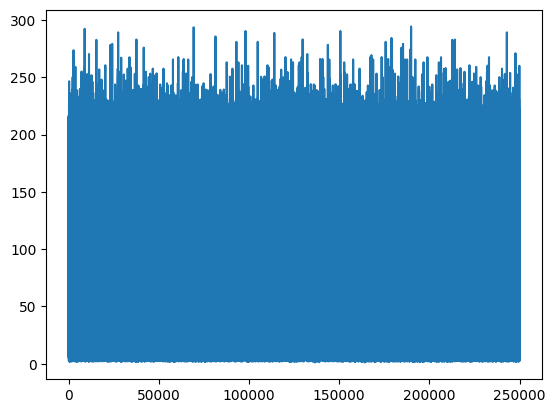

In [ ]:
plt.plot(predictions)

In [ ]:
output= pd.DataFrame({'id': X_test.id, 'Calories': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
